## Import Neccessary Libraries

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

## Import Dataset

In [6]:
company_data=pd.read_csv('Company_Data.csv')
company_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


## Data Understanding 

In [7]:
company_data.shape

(400, 11)

In [9]:
company_data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [10]:
company_data.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [11]:
company_data.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

### Inference
* Number of features and records in the given data set is 11 and 400 respesctively

* There is no null values in the data set

* The categorical data can be converted into numeric data type by using encoder so that the model can learn the things more easily

## Data Preparation

In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [13]:
 company_data['ShelveLoc'].unique(),company_data['Urban'].unique(),company_data['US'].unique()

(array(['Bad', 'Good', 'Medium'], dtype=object),
 array(['Yes', 'No'], dtype=object),
 array(['Yes', 'No'], dtype=object))

In [15]:
company_data['ShelveLoc']=le.fit_transform(company_data['ShelveLoc'])
company_data['Urban']=le.fit_transform(company_data['Urban'])
company_data['US']=le.fit_transform(company_data['US'])
company_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


In [17]:
company_data.insert(11,'sales_category','')
company_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_category
0,9.50,138,73,11,276,120,0,42,17,1,1,
1,11.22,111,48,16,260,83,1,65,10,1,1,
2,10.06,113,35,10,269,80,2,59,12,1,1,
3,7.40,117,100,4,466,97,2,55,14,1,1,
4,4.15,141,64,3,340,128,0,38,13,1,0,
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,
396,6.14,139,23,3,37,120,2,55,11,0,1,
397,7.41,162,26,12,368,159,2,40,18,1,1,
398,5.94,100,79,7,284,95,0,50,12,1,1,


In [18]:
for i in range(0,len(company_data['Sales']),1):
    if company_data['Sales'][i]>=11.0:
        company_data["sales_category"][i]='high'
    elif company_data['Sales'][i]<=6.0:
        company_data['sales_category'][i]='Low'
    else:
        company_data['sales_category'][i]='Medium'

In [19]:
company_data['sales_category'].nunique()

3

In [20]:
company_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_category
0,9.50,138,73,11,276,120,0,42,17,1,1,Medium
1,11.22,111,48,16,260,83,1,65,10,1,1,high
2,10.06,113,35,10,269,80,2,59,12,1,1,Medium
3,7.40,117,100,4,466,97,2,55,14,1,1,Medium
4,4.15,141,64,3,340,128,0,38,13,1,0,Low


### Model building

In [21]:
x=company_data.iloc[:,1:11]
y=company_data.iloc[:,11:12]

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

### Model training before selecting important feature

In [23]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()

In [24]:
dt_model.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)

In [25]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         Low       0.54      0.65      0.59        23
      Medium       0.68      0.62      0.65        48
        high       0.38      0.33      0.35         9

    accuracy                           0.60        80
   macro avg       0.53      0.54      0.53        80
weighted avg       0.61      0.60      0.60        80



In [27]:
print(accuracy_score(y_test,y_pred))

0.6


In [28]:
print(confusion_matrix(y_test,y_pred))

[[15  8  0]
 [13 30  5]
 [ 0  6  3]]


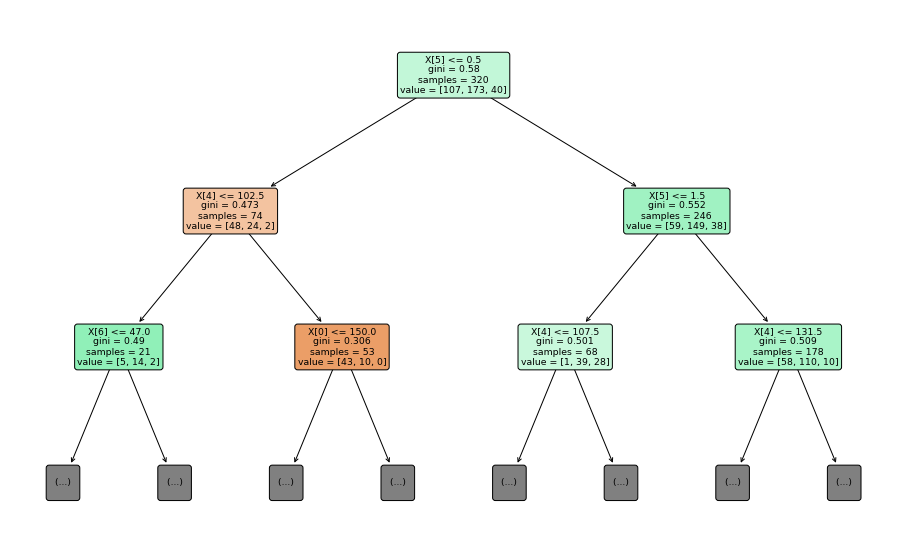

In [29]:
from sklearn import tree
plt.figure(figsize=(16,10))
tree.plot_tree(dt_model,rounded=True,filled=True,max_depth=2)
plt.show()

#### Hyperparameter tweaking by using GridsearchCV

In [30]:
from sklearn.model_selection import GridSearchCV
grid_model=GridSearchCV(estimator = dt_model,param_grid={'criterion':['entropy','gini'],
                                                       'max_depth':[2,4,8,10],
                                                        'min_samples_split':[2,4,6,8],
                                                        'min_samples_leaf':[1,2,3,4]})
grid_model.fit(x_train,y_train)
print(grid_model.best_params_)
print(grid_model.best_score_)

{'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 3, 'min_samples_split': 2}
0.665625


In [32]:
dt_model_cv=DecisionTreeClassifier(max_depth=4,min_samples_leaf=3)
dt_model_cv.fit(x_train,y_train)
y_pred=dt_model_cv.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.7


#### Feature importance plot

In [33]:
feature_dt=x_train.columns
len(feature_dt)

10

In [34]:
imp_feature_dt=dt_model.feature_importances_
len(imp_feature_dt)

10

In [35]:
data_dt=pd.DataFrame({'feature':feature_dt,'imp_feature':imp_feature_dt})
data_dt=data_dt.sort_values('imp_feature')

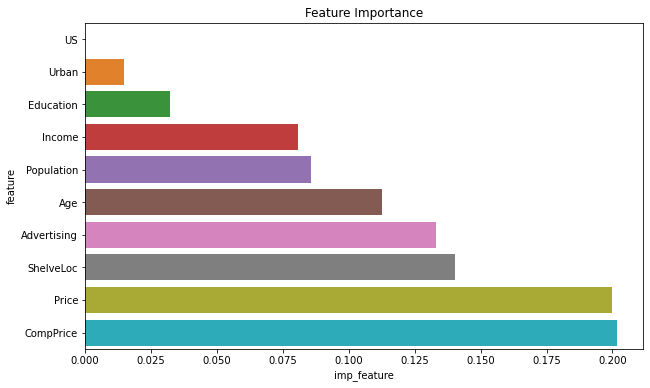

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(y='feature', x='imp_feature', data=data_dt)
plt.show()

### Inference 
* The plot clearly shows that some of the features donot contribute much for model building

* Hence the accuracy can be imporved by droping those insignificant features

### Feature selection by feature importance for Decision tree

In [37]:
from sklearn.feature_selection import SelectFromModel 

In [38]:
selector=SelectFromModel(estimator=DecisionTreeClassifier())
selector.fit(x_train,y_train)

SelectFromModel(estimator=DecisionTreeClassifier())

In [39]:
selector.get_support()

array([ True, False,  True, False,  True,  True,  True, False, False,
       False])

In [40]:
len(x_train.columns)

10

In [41]:
feature=x_train.columns[selector.get_support()]

In [42]:
len(x_train.columns[selector.get_support()])

5

### Inference
* Out of 10 features only 5 features is selscted for building models

In [45]:
x_train_dt=selector.transform(x_train)
x_test_dt=selector.transform(x_test)

In [46]:
dt_model_imp=DecisionTreeClassifier().fit(x_train_dt,y_train)
y_pred_imp=dt_model_imp.predict(x_test_dt)

In [47]:
print(accuracy_score(y_test,y_pred_imp))

0.6125


In [48]:
print(confusion_matrix(y_test,y_pred_imp))

[[15  8  0]
 [11 30  7]
 [ 0  5  4]]


In [49]:
print(classification_report(y_test,y_pred_imp))

              precision    recall  f1-score   support

         Low       0.58      0.65      0.61        23
      Medium       0.70      0.62      0.66        48
        high       0.36      0.44      0.40         9

    accuracy                           0.61        80
   macro avg       0.55      0.57      0.56        80
weighted avg       0.63      0.61      0.62        80



In [50]:
imp_feature=dt_model_imp.feature_importances_
imp_feature

array([0.22137473, 0.17862961, 0.28382625, 0.14010536, 0.17606405])

In [51]:
data_imp=pd.DataFrame({'feature':feature,'imp_feature':imp_feature})
data_imp=data_imp.sort_values('imp_feature')

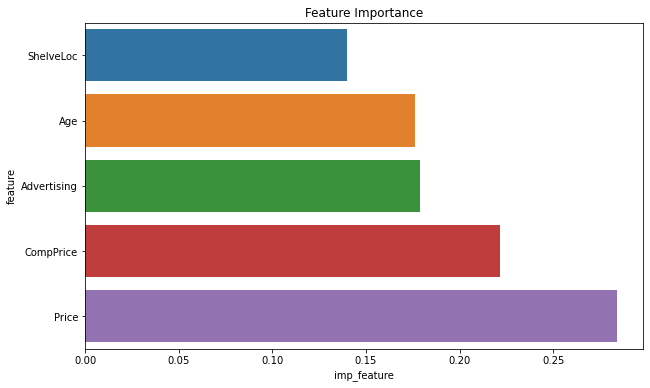

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(y='feature', x='imp_feature', data=data_imp)
plt.show()

### Recursive feature elimination

In [53]:
from sklearn.feature_selection import RFE

In [54]:
selector_rfe=RFE(DecisionTreeClassifier())
selector_rfe.fit(x_train,y_train)

RFE(estimator=DecisionTreeClassifier())

In [55]:
selector_rfe.get_support()

array([ True, False,  True,  True,  True,  True, False, False, False,
       False])

In [56]:
feature_rfe=x_train.columns[selector_rfe.get_support()]
feature_rfe

Index(['CompPrice', 'Advertising', 'Population', 'Price', 'ShelveLoc'], dtype='object')

In [57]:
len(x_train.columns[selector_rfe.get_support()])

5

### Inference
* Here 5 out of 10 feature is selscted as an important feature

In [58]:
x_train_rfe=selector_rfe.transform(x_train)
x_test_rfe=selector_rfe.transform(x_test)

In [59]:
dt_model_rfe=DecisionTreeClassifier().fit(x_train_rfe,y_train)

In [60]:
y_pred_rfe=dt_model_rfe.predict(x_test_rfe)

In [61]:
print(accuracy_score(y_test,y_pred_rfe))

0.6125


In [62]:
print(confusion_matrix(y_test,y_pred_rfe))

[[14  9  0]
 [ 9 32  7]
 [ 0  6  3]]


In [63]:
print(classification_report(y_test,y_pred_rfe))

              precision    recall  f1-score   support

         Low       0.61      0.61      0.61        23
      Medium       0.68      0.67      0.67        48
        high       0.30      0.33      0.32         9

    accuracy                           0.61        80
   macro avg       0.53      0.54      0.53        80
weighted avg       0.62      0.61      0.61        80



In [64]:
imp_feature_rfe=dt_model_rfe.feature_importances_

In [65]:
data_rfe=pd.DataFrame({'feature':feature_rfe,'imp_feature':imp_feature_rfe})
data_rfe=data_rfe.sort_values('imp_feature')

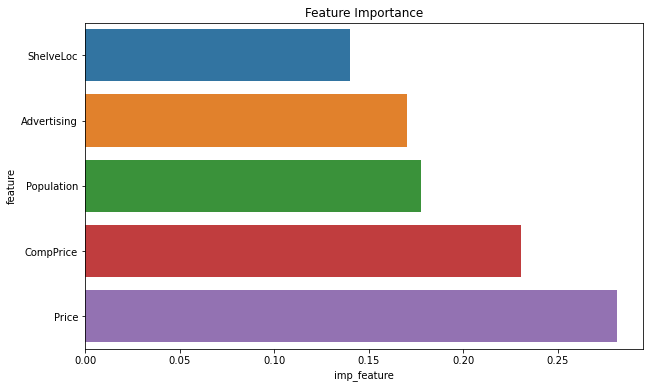

In [66]:
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(y='feature', x='imp_feature', data=data_rfe)
plt.show()

### Inference

* Price is the feature which affect/contibute more for the sales

* Competerior price fallows price which affect the most